<a href="https://colab.research.google.com/github/tigerak/1st_practice/blob/main/D02_%ED%85%90%EC%84%9C%ED%94%8C%EB%A1%9C%EC%9A%B0%ED%9A%8C%EA%B7%80%EB%B6%84%EC%84%9D%EB%AA%A8%EB%8D%B8.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# 텐서플로우 회귀 분석 모델

# 선형 회귀

In [21]:
import numpy as np
import tensorflow as tf
import matplotlib.pyplot as plt


In [22]:
learning_rate = 0.01
training_steps = 1000

In [23]:
X = np.random.randn(50)
Y = 2 * X + np.random.randn(50)

In [24]:
W = tf.Variable(np.random.randn(), name='weight')
b = tf.Variable(np.random.randn(), name='bias')

def linear_regression(x):
    return W * x + b

def mean_square(y_pred, y_true):
    return tf.reduce_mean(tf.square(y_pred - y_true))

optimizer = tf.optimizers.SGD(learning_rate)

In [27]:
def run_optimization():
    with tf.GradientTape() as tape:
        pred = linear_regression(X)
        loss = mean_square(pred, Y)

    gradients = tape.gradient(loss, [W, b])

    optimizer.apply_gradients(zip(gradients, [W, b]))

In [29]:
for step in range(1, training_steps + 1):
    run_optimization()

    if step % 50 == 0:
        pred = linear_regression(X)
        loss = mean_square(pred, Y)
        print('step : {:4d}\tloss : {:.4f}\tW : {:.4f}\tb : {:.4f}'.format(step, loss, W.numpy(), b.numpy()))

step :   50	loss : 1.1052	W : 1.7513	b : 0.0318
step :  100	loss : 1.0145	W : 1.9496	b : 0.0936
step :  150	loss : 0.9973	W : 2.0319	b : 0.1311
step :  200	loss : 0.9939	W : 2.0670	b : 0.1511
step :  250	loss : 0.9932	W : 2.0822	b : 0.1611
step :  300	loss : 0.9931	W : 2.0890	b : 0.1659
step :  350	loss : 0.9930	W : 2.0919	b : 0.1682
step :  400	loss : 0.9930	W : 2.0933	b : 0.1693
step :  450	loss : 0.9930	W : 2.0939	b : 0.1698
step :  500	loss : 0.9930	W : 2.0942	b : 0.1700
step :  550	loss : 0.9930	W : 2.0943	b : 0.1701
step :  600	loss : 0.9930	W : 2.0944	b : 0.1701
step :  650	loss : 0.9930	W : 2.0944	b : 0.1702
step :  700	loss : 0.9930	W : 2.0944	b : 0.1702
step :  750	loss : 0.9930	W : 2.0944	b : 0.1702
step :  800	loss : 0.9930	W : 2.0944	b : 0.1702
step :  850	loss : 0.9930	W : 2.0944	b : 0.1702
step :  900	loss : 0.9930	W : 2.0944	b : 0.1702
step :  950	loss : 0.9930	W : 2.0944	b : 0.1702
step : 1000	loss : 0.9930	W : 2.0944	b : 0.1702


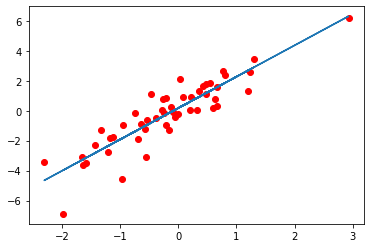

In [30]:
plt.plot(X, Y, 'ro', label='Data')
plt.plot(X, np.array(W * X + b), label='Fitting Line')

# 다항 회귀 (Non-linear Regression)

In [80]:
from tensorflow.keras.optimizers import Adam

In [81]:
epochs = 1000
learning_rate = 0.04

In [124]:
a = tf.Variable(np.random.randn())
b = tf.Variable(np.random.randn())
c = tf.Variable(np.random.randn())

In [125]:
X = np.random.randn(50)
Y = X**2 + X*np.random.randn(50)

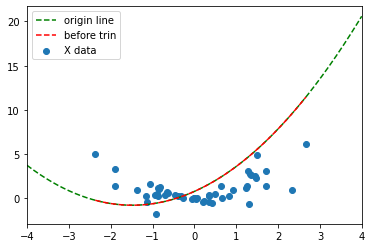

In [126]:
line_x = np.arange(min(X), max(X), 0.001)
line_y = a*line_x**2 + b*line_x + c

x_ = np.arange(-4., 4., 0.001)
y_ = a*x_**2 + b*x_ + c

plt.scatter(X, Y, label='X data')
plt.plot(x_, y_, 'g--', label='origin line')
plt.plot(line_x, line_y, 'r--', label='before trin')
plt.xlim(-4., 4.)
plt.legend();

In [127]:
def compute_loss():
    pred_y = a*(np.array(X)**2) + b*np.array(X) + c
    loss = tf.reduce_mean((Y - pred_y)**2)
    return loss

In [128]:
optimizer = Adam(learning_rate=learning_rate)

In [129]:
for epoch in range(1, epochs + 1, 1):
    optimizer.minimize(compute_loss, var_list=[a, b, c])

    if epoch % 100 == 0:
        print('epoch : {:4d}\ta : {:.4f}\tb : {:.4f}\tc : {:.4f}'.format(epoch, a.numpy(), b.numpy(), c.numpy()))

epoch :  100	a : 0.7213	b : 0.1265	c : 0.1126
epoch :  200	a : 0.7156	b : 0.1413	c : 0.1152
epoch :  300	a : 0.7155	b : 0.1413	c : 0.1152
epoch :  400	a : 0.7155	b : 0.1413	c : 0.1152
epoch :  500	a : 0.7155	b : 0.1413	c : 0.1152
epoch :  600	a : 0.7155	b : 0.1413	c : 0.1152
epoch :  700	a : 0.7155	b : 0.1413	c : 0.1152
epoch :  800	a : 0.7155	b : 0.1413	c : 0.1152
epoch :  900	a : 0.7155	b : 0.1413	c : 0.1152
epoch : 1000	a : 0.7155	b : 0.1413	c : 0.1152


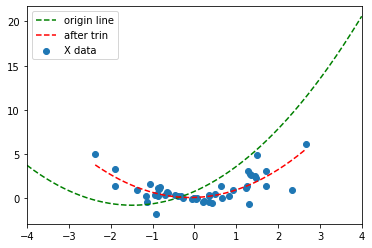

In [130]:
line_x = np.arange(min(X), max(X), 0.001)
line_y = a*line_x**2 + b*line_x + c

plt.scatter(X, Y, label='X data')
plt.plot(x_, y_, 'g--', label='origin line')
plt.plot(line_x, line_y, 'r--', label='after trin')
plt.xlim(-4., 4.)
plt.legend();

# 로지스틱 회귀

- 다항분류, mnist

In [131]:
from tensorflow.keras.datasets import mnist

In [132]:
num_classes = 10
num_features = 784 # 28 * 28

learning_rate = 0.1
training_steps = 1000
batch_size = 256

In [134]:
(x_train, y_train), (x_test, y_test) = mnist.load_data()

x_train, x_test = np.array(x_train, np.float32), np.array(x_test, np.float32)

x_train, x_test = x_train.reshape([-1, num_features]), x_test.reshape([-1, num_features])

x_train, x_test = x_train / 255., x_test / 255.

In [135]:
train_data = tf.data.Dataset.from_tensor_slices((x_train, y_train))
train_data = train_data.repeat().shuffle(5000).batch(batch_size).prefetch(1)

In [136]:
W = tf.Variable(tf.random.normal([num_features, num_classes]), name='weight')
b = tf.Variable(tf.zeros([num_classes]), name='bias')

In [137]:
def logistic_regression(x):
    return tf.nn.softmax(tf.matmul(x, W) + b)

def cross_entropy(pred_y, true_y):
    true_y = tf.one_hot(true_y, depth=num_classes)
    pred_y = tf.clip_by_value(pred_y, 1e-9, 1.)

    return tf.reduce_mean(-tf.reduce_sum(true_y * tf.math.log(pred_y), 1))

def accuracy(y_pred, y_true):
    correct_prediction = tf.equal(tf.argmax(y_pred, 1), tf.cast(y_true, tf.int64))
    return tf.reduce_mean(tf.cast(correct_prediction, tf.float32))

In [138]:
optimizer = tf.optimizers.SGD(learning_rate)

In [139]:
def run_optimization(x, y):
    with tf.GradientTape() as tape:
        pred = logistic_regression(x)
        loss = cross_entropy(pred, y)

    gradients = tape.gradient(loss, [W, b])

    optimizer.apply_gradients(zip(gradients, [W, b]))

In [142]:
for step, (batch_x, batch_y) in enumerate(train_data.take(training_steps), 1):
    run_optimization(batch_x, batch_y)

    if step % 50 == 0:
        pred = logistic_regression(batch_x)
        loss = cross_entropy(pred, batch_y)
        acc = accuracy(pred, batch_y)
        print('step : {:4d}\tloss : {:.4f}\taccuracy : {:.4f}'.format(step, loss, acc))

step :   50	loss : 5.4131	accuracy : 0.3438
step :  100	loss : 3.1609	accuracy : 0.4961
step :  150	loss : 2.8784	accuracy : 0.5039
step :  200	loss : 1.6672	accuracy : 0.6602
step :  250	loss : 1.9001	accuracy : 0.6055
step :  300	loss : 1.7301	accuracy : 0.6680
step :  350	loss : 1.3304	accuracy : 0.7148
step :  400	loss : 1.4045	accuracy : 0.7109
step :  450	loss : 1.1245	accuracy : 0.7930
step :  500	loss : 1.6286	accuracy : 0.7227
step :  550	loss : 1.2583	accuracy : 0.7734
step :  600	loss : 1.5433	accuracy : 0.6992
step :  650	loss : 1.5288	accuracy : 0.7422
step :  700	loss : 1.0246	accuracy : 0.8125
step :  750	loss : 1.0727	accuracy : 0.7812
step :  800	loss : 1.0109	accuracy : 0.8125
step :  850	loss : 1.2012	accuracy : 0.7734
step :  900	loss : 1.5809	accuracy : 0.7422
step :  950	loss : 0.7013	accuracy : 0.8242
step : 1000	loss : 0.9417	accuracy : 0.8008


In [143]:
pred = logistic_regression(x_test)
print('Test Accuracy : {}'.format(accuracy(pred, y_test)))

Test Accuracy : 0.8184999823570251


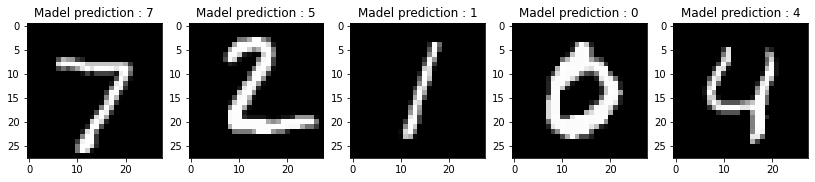

In [144]:
num_images = 5
test_images = x_test[:num_images]
predictions = logistic_regression(test_images)

plt.figure(figsize=(14, 8))
for i in range(1, num_images+1, 1):
    plt.subplot(1, num_images, i)
    plt.imshow(np.reshape(test_images[i-1], [28, 28]), cmap='gray')
    plt.title('Madel prediction : {}'.format(np.argmax(predictions.numpy()[i-1])));